# Machine Learning Model To Predict the Payment Date 

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import random
import warnings
import sklearn
import xgboost as xgb
from scipy import stats
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split , GridSearchCV,cross_val_score,cross_val_predict,cross_validate,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,max_error,r2_score,median_absolute_error,mean_squared_log_error
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_regression
from sklearn.preprocessing import MinMaxScaler,normalize,StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_columns', 1000) # or 1000.
pd. set_option('display.max_rows', 1000) # or 1000.

In [2]:
#reading the csv file
df= pd.read_csv("data.csv")

In [3]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2019-05-07 00:00:00,2019.0,1.929179e+09,2019-04-20,20190419,20190420,20190505.0,USD,RV,1.0,NaN,15112.61,20190420.0,NAH4,1.929179e+09,0
1,U001,0200769623,WAL-MAR associates,2019-10-17 00:00:00,2019.0,1.929962e+09,2019-10-04,20191004,20191004,20191019.0,USD,RV,1.0,NaN,9429.62,20191004.0,NAH4,1.929962e+09,0
2,U001,0200508557,FOODL foundation,2019-04-08 00:00:00,2019.0,1.928971e+09,2019-03-22,20190315,20190322,20190406.0,USD,RV,1.0,NaN,2560.91,20190322.0,NAA8,1.928971e+09,0
3,U001,0200769623,WAL-MAR llc,2020-03-03 00:00:00,2020.0,1.930549e+09,2020-02-22,20200220,20200222,20200308.0,USD,RV,1.0,NaN,6006.40,20200222.0,NAH4,1.930549e+09,0
4,U001,0200772670,ASSOCIAT trust,2019-05-01 00:00:00,2019.0,1.929168e+09,2019-04-18,20190418,20190418,20190503.0,USD,RV,1.0,NaN,11905.20,20190418.0,NAU5,1.929168e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200726979,BJ'S systems,2020-01-28 00:00:00,2020.0,1.930395e+09,2020-01-13,20200113,20200113,20200128.0,USD,RV,1.0,NaN,206.74,20200113.0,NAA8,1.930395e+09,0
49996,U001,0200772595,SAFEW corporation,2019-04-29 00:00:00,2019.0,1.928838e+09,2019-02-21,20190221,20190221,20190427.0,USD,RV,1.0,NaN,2588.65,20190221.0,NAGD,1.928838e+09,0
49997,U001,0200772670,ASSOCIAT co,2019-06-13 00:00:00,2019.0,1.929387e+09,2019-05-29,20190528,20190529,20190613.0,USD,RV,1.0,NaN,2611.44,20190529.0,NAU5,1.929387e+09,0
49998,U001,0200706844,WINC,NaN,2020.0,1.930757e+09,2020-04-08,20200406,20200408,20200423.0,USD,RV,1.0,NaN,5880.96,20200408.0,NAA8,1.930757e+09,1


In [4]:
#Coverting to date format for creating target column
df['clear_date'] = pd.to_datetime(df['clear_date'])
df["due_in_date"]= pd.to_datetime(df.due_in_date,format='%Y%m%d')


In [5]:
#A new column is formed by subtracting the clear_date column with due_in_date column
df["delay"]=df["clear_date"] - df["due_in_date"]
df["delay"]=df["delay"]/np.timedelta64(1,"D")
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200769623,WAL-MAR corp,2019-05-07,2019.0,1.929179e+09,2019-04-20,20190419,20190420,2019-05-05,USD,RV,1.0,NaN,15112.61,20190420.0,NAH4,1.929179e+09,0,2.0
1,U001,0200769623,WAL-MAR associates,2019-10-17,2019.0,1.929962e+09,2019-10-04,20191004,20191004,2019-10-19,USD,RV,1.0,NaN,9429.62,20191004.0,NAH4,1.929962e+09,0,-2.0
2,U001,0200508557,FOODL foundation,2019-04-08,2019.0,1.928971e+09,2019-03-22,20190315,20190322,2019-04-06,USD,RV,1.0,NaN,2560.91,20190322.0,NAA8,1.928971e+09,0,2.0
3,U001,0200769623,WAL-MAR llc,2020-03-03,2020.0,1.930549e+09,2020-02-22,20200220,20200222,2020-03-08,USD,RV,1.0,NaN,6006.40,20200222.0,NAH4,1.930549e+09,0,-5.0
4,U001,0200772670,ASSOCIAT trust,2019-05-01,2019.0,1.929168e+09,2019-04-18,20190418,20190418,2019-05-03,USD,RV,1.0,NaN,11905.20,20190418.0,NAU5,1.929168e+09,0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200726979,BJ'S systems,2020-01-28,2020.0,1.930395e+09,2020-01-13,20200113,20200113,2020-01-28,USD,RV,1.0,NaN,206.74,20200113.0,NAA8,1.930395e+09,0,0.0
49996,U001,0200772595,SAFEW corporation,2019-04-29,2019.0,1.928838e+09,2019-02-21,20190221,20190221,2019-04-27,USD,RV,1.0,NaN,2588.65,20190221.0,NAGD,1.928838e+09,0,2.0
49997,U001,0200772670,ASSOCIAT co,2019-06-13,2019.0,1.929387e+09,2019-05-29,20190528,20190529,2019-06-13,USD,RV,1.0,NaN,2611.44,20190529.0,NAU5,1.929387e+09,0,0.0
49998,U001,0200706844,WINC,NaT,2020.0,1.930757e+09,2020-04-08,20200406,20200408,2020-04-23,USD,RV,1.0,NaN,5880.96,20200408.0,NAA8,1.930757e+09,1,NaN


In [6]:
#checking how many null values
df.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
delay                     10000
dtype: int64

## Removing the data points where the target value is null

### Target column is the delay

In [7]:
main_train = df[df.delay.isnull()==False]
main_test =  df[df.delay.isnull()==True]

In [8]:
main_train.shape

(40000, 20)

In [9]:
main_train.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
delay                         0
dtype: int64

In [10]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200769623,WAL-MAR corp,2019-05-07,2019.0,1.929179e+09,2019-04-20,20190419,20190420,2019-05-05,USD,RV,1.0,NaN,15112.61,20190420.0,NAH4,1.929179e+09,0,2.0
1,U001,0200769623,WAL-MAR associates,2019-10-17,2019.0,1.929962e+09,2019-10-04,20191004,20191004,2019-10-19,USD,RV,1.0,NaN,9429.62,20191004.0,NAH4,1.929962e+09,0,-2.0
2,U001,0200508557,FOODL foundation,2019-04-08,2019.0,1.928971e+09,2019-03-22,20190315,20190322,2019-04-06,USD,RV,1.0,NaN,2560.91,20190322.0,NAA8,1.928971e+09,0,2.0
3,U001,0200769623,WAL-MAR llc,2020-03-03,2020.0,1.930549e+09,2020-02-22,20200220,20200222,2020-03-08,USD,RV,1.0,NaN,6006.40,20200222.0,NAH4,1.930549e+09,0,-5.0
4,U001,0200772670,ASSOCIAT trust,2019-05-01,2019.0,1.929168e+09,2019-04-18,20190418,20190418,2019-05-03,USD,RV,1.0,NaN,11905.20,20190418.0,NAU5,1.929168e+09,0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200769623,WAL-MAR associates,2019-11-12,2019.0,1.930087e+09,2019-11-02,20191101,20191102,2019-11-17,USD,RV,1.0,NaN,51359.76,20191102.0,NAH4,1.930087e+09,0,-5.0
49995,U001,0200726979,BJ'S systems,2020-01-28,2020.0,1.930395e+09,2020-01-13,20200113,20200113,2020-01-28,USD,RV,1.0,NaN,206.74,20200113.0,NAA8,1.930395e+09,0,0.0
49996,U001,0200772595,SAFEW corporation,2019-04-29,2019.0,1.928838e+09,2019-02-21,20190221,20190221,2019-04-27,USD,RV,1.0,NaN,2588.65,20190221.0,NAGD,1.928838e+09,0,2.0
49997,U001,0200772670,ASSOCIAT co,2019-06-13,2019.0,1.929387e+09,2019-05-29,20190528,20190529,2019-06-13,USD,RV,1.0,NaN,2611.44,20190529.0,NAU5,1.929387e+09,0,0.0


## Preprocessing

#### Null Imputation

In [11]:
#Dropping the record containing null value as the invoice_id is MCAR
main_train[main_train.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
29112,CA02,0140104409,LOB corp,2019-12-27,2019.0,9.500000e+09,2019-03-29,20190329,20181204,2018-12-14,CAD,X2,1.0,NaN,305.64,20181204.0,CA10,NaN,0,378.0
38413,CA02,0140104409,LOB co,2019-05-08,2019.0,9.500000e+09,2019-03-29,20190329,20190220,2019-03-02,CAD,X2,1.0,NaN,14172.84,20190220.0,CA10,NaN,0,67.0


In [12]:
main_train["doc_id"]=main_train.doc_id.astype(int)
main_train["buisness_year"]=main_train.buisness_year.astype(int)

In [13]:
comparison_column = np.where(main_train["doc_id"] == main_train["invoice_id"], True, False)
comparison_column

array([ True,  True,  True, ...,  True,  True,  True])

In [14]:
#drppping invoice_id as the doc_id and invoice_id are same in main_train
main_train.drop("invoice_id",axis=1,inplace=True)

In [15]:
#dropping area_business as it contains all null values
main_train.drop("area_business",axis=1,inplace=True)

## Date and Time Conversion

In [16]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           40000 non-null  object        
 1   cust_number             40000 non-null  object        
 2   name_customer           40000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           40000 non-null  int32         
 5   doc_id                  40000 non-null  int32         
 6   posting_date            40000 non-null  object        
 7   document_create_date    40000 non-null  int64         
 8   document_create_date.1  40000 non-null  int64         
 9   due_in_date             40000 non-null  datetime64[ns]
 10  invoice_currency        40000 non-null  object        
 11  document type           40000 non-null  object        
 12  posting_id              40000 non-null  float6

In [17]:
main_train["posting_date"]= pd.to_datetime(main_train["posting_date"])
main_train["document_create_date"]= pd.to_datetime(main_train.document_create_date,format='%Y%m%d')
main_train["baseline_create_date"]= pd.to_datetime(main_train.baseline_create_date,format='%Y%m%d')



In [18]:
#renaming the column document_create_date.1 to document_create_date1 for changing it to the datetime format
main_train.rename(columns={"document_create_date.1":"document_create_date1"}, inplace=True)

In [19]:
main_train["document_create_date1"]= pd.to_datetime(main_train.document_create_date1,format='%Y%m%d')

In [20]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   business_code          40000 non-null  object        
 1   cust_number            40000 non-null  object        
 2   name_customer          40000 non-null  object        
 3   clear_date             40000 non-null  datetime64[ns]
 4   buisness_year          40000 non-null  int32         
 5   doc_id                 40000 non-null  int32         
 6   posting_date           40000 non-null  datetime64[ns]
 7   document_create_date   40000 non-null  datetime64[ns]
 8   document_create_date1  40000 non-null  datetime64[ns]
 9   due_in_date            40000 non-null  datetime64[ns]
 10  invoice_currency       40000 non-null  object        
 11  document type          40000 non-null  object        
 12  posting_id             40000 non-null  float64       
 13  t

## Duplicate/Constant column removal

In [21]:
#dropping document_create_date1 because it has the same values as posting_date
main_train.drop("document_create_date1",axis=1,inplace=True)

In [22]:
main_train.nunique()

business_code               6
cust_number              1339
name_customer            3847
clear_date                392
buisness_year               2
doc_id                  36106
posting_date              425
document_create_date      425
due_in_date               491
invoice_currency            2
document type               2
posting_id                  1
total_open_amount       35786
baseline_create_date      433
cust_payment_terms         69
isOpen                      1
delay                     178
dtype: int64

In [23]:
main_train.business_code.value_counts()

U001    36216
CA02     3145
U013      513
U002      117
U005        8
U007        1
Name: business_code, dtype: int64

In [24]:
# clubbing bussiness_code with low occurance in dataset - to ensure model gets max information
main_train["business_code"]= np.where(main_train["business_code"].isin(["U005","U007"]),"Others",main_train["business_code"])

In [25]:
#renaming document type to document_type 
main_train.rename(columns={"document type":"document_type"}, inplace=True)


In [26]:
main_train.posting_id.value_counts()

1.0    40000
Name: posting_id, dtype: int64

In [27]:
#renaming isOpen to is_open
main_train.rename(columns={"isOpen":"is_open"}, inplace=True)

In [28]:
main_train.is_open.value_counts()

0    40000
Name: is_open, dtype: int64

In [29]:
#Removing Constant Columns ->>Columns which have same values
unique_cols =  [x for x in main_train.columns if main_train[x].nunique()==1] 
print(unique_cols)
main_train.drop(unique_cols,axis=1,inplace=True)
main_train.columns

['posting_id', 'is_open']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'due_in_date', 'invoice_currency', 'document_type', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'delay'],
      dtype='object')

In [30]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document_type,total_open_amount,baseline_create_date,cust_payment_terms,delay
0,U001,0200769623,WAL-MAR corp,2019-05-07,2019,1929179048,2019-04-20,2019-04-19,2019-05-05,USD,RV,15112.61,2019-04-20,NAH4,2.0
1,U001,0200769623,WAL-MAR associates,2019-10-17,2019,1929961839,2019-10-04,2019-10-04,2019-10-19,USD,RV,9429.62,2019-10-04,NAH4,-2.0
2,U001,0200508557,FOODL foundation,2019-04-08,2019,1928971348,2019-03-22,2019-03-15,2019-04-06,USD,RV,2560.91,2019-03-22,NAA8,2.0
3,U001,0200769623,WAL-MAR llc,2020-03-03,2020,1930549049,2020-02-22,2020-02-20,2020-03-08,USD,RV,6006.40,2020-02-22,NAH4,-5.0
4,U001,0200772670,ASSOCIAT trust,2019-05-01,2019,1929168485,2019-04-18,2019-04-18,2019-05-03,USD,RV,11905.20,2019-04-18,NAU5,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200769623,WAL-MAR associates,2019-11-12,2019,1930086848,2019-11-02,2019-11-01,2019-11-17,USD,RV,51359.76,2019-11-02,NAH4,-5.0
49995,U001,0200726979,BJ'S systems,2020-01-28,2020,1930394925,2020-01-13,2020-01-13,2020-01-28,USD,RV,206.74,2020-01-13,NAA8,0.0
49996,U001,0200772595,SAFEW corporation,2019-04-29,2019,1928838009,2019-02-21,2019-02-21,2019-04-27,USD,RV,2588.65,2019-02-21,NAGD,2.0
49997,U001,0200772670,ASSOCIAT co,2019-06-13,2019,1929386740,2019-05-29,2019-05-28,2019-06-13,USD,RV,2611.44,2019-05-29,NAU5,0.0


In [31]:
#dropping invoice_currency column as business_code has the details of whether the amount is USD or CAD
main_train.drop("invoice_currency",axis=1,inplace=True)

#### Finding & Removing duplicate records in rows

In [32]:
main_train=main_train.drop_duplicates(keep='first')
main_train.shape

(39193, 14)

### Sorting the data by posting_date

In [33]:
main_train.sort_values(by=["posting_date"],inplace=True)

In [34]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,document_type,total_open_amount,baseline_create_date,cust_payment_terms,delay
8212,U001,0200744019,TARG us,2019-01-22,2019,1928537219,2018-12-30,2018-12-29,2019-01-14,RV,17612.00,2018-12-30,NAA8,8.0
6062,U001,0200769623,WAL-MAR co,2019-01-17,2019,1928543334,2018-12-30,2018-12-30,2019-01-14,RV,26851.14,2018-12-30,NAH4,3.0
49831,U001,0200744019,TARG systems,2019-01-18,2019,1928539833,2018-12-30,2018-12-29,2019-01-14,RV,39713.18,2018-12-30,NAA8,4.0
34965,U001,0200726979,BJ'S foundation,2019-01-15,2019,1928540822,2018-12-30,2018-12-29,2019-01-14,RV,321.54,2018-12-30,NAA8,1.0
36575,U001,0200769623,WAL-MAR trust,2019-01-10,2019,1928542166,2018-12-30,2018-12-30,2019-01-14,RV,3748.84,2018-12-30,NAH4,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,U001,0200762950,HAR,2020-03-10,2020,1930562576,2020-02-26,2020-02-24,2020-03-12,RV,149803.12,2020-02-26,NAA8,-2.0
41465,CA02,0140106249,FINDLAY trust,2020-03-11,2020,-2147483648,2020-02-27,2020-02-27,2020-03-10,RV,12104.10,2020-02-29,CA10,1.0
34039,U001,0200769623,WAL-MAR trust,2020-03-17,2020,1930567788,2020-02-27,2020-02-25,2020-03-13,RV,10401.63,2020-02-27,NAH4,4.0
12589,U001,0200739534,OK corporation,2020-03-13,2020,1930580801,2020-02-27,2020-02-27,2020-03-13,RV,5434.31,2020-02-27,NAA8,0.0


In [35]:
#removing baseline_create_date as it has the same values of posting_date
main_train.drop("baseline_create_date",axis=1,inplace=True)
main_train
#removing document_type as it has an array of same values "RV".
main_train.drop("document_type",axis=1,inplace=True)

### Split Data

##### splitting the main_train data into Train,Validation and test

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X= main_train.drop(["delay"],axis=1)

In [38]:
y=main_train["delay"]

In [39]:
#splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set
X_train,X_inter_test,y_train,y_inter_test=train_test_split(X,y,test_size=0.3,random_state=0,shuffle=False)

In [40]:
X_train.shape,X_inter_test.shape

((27435, 11), (11758, 11))

In [41]:
#splitting the data first into two part -- doing a 15:15 split i.e 15% data fed to test data set
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0,shuffle=False)

In [42]:
X_train.shape ,X_val.shape ,X_test.shape

((27435, 11), (5879, 11), (5879, 11))

# EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

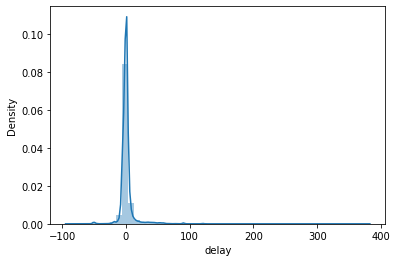

In [43]:
# distribution of the target column 
# right skewed distribution
# outliers present but not that significant , hence 
sns.distplot(y_train)

<AxesSubplot:xlabel='delay', ylabel='Count'>

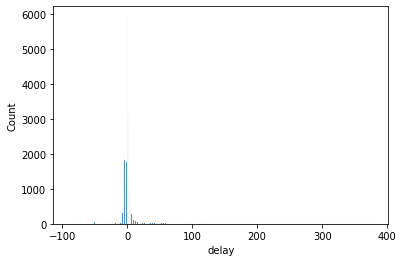

In [44]:
sns.histplot(y_train)

In [45]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,delay
0,8212,U001,0200744019,TARG us,2019-01-22,2019,1928537219,2018-12-30,2018-12-29,2019-01-14,17612.00,NAA8,8.0
1,6062,U001,0200769623,WAL-MAR co,2019-01-17,2019,1928543334,2018-12-30,2018-12-30,2019-01-14,26851.14,NAH4,3.0
2,49831,U001,0200744019,TARG systems,2019-01-18,2019,1928539833,2018-12-30,2018-12-29,2019-01-14,39713.18,NAA8,4.0
3,34965,U001,0200726979,BJ'S foundation,2019-01-15,2019,1928540822,2018-12-30,2018-12-29,2019-01-14,321.54,NAA8,1.0
4,36575,U001,0200769623,WAL-MAR trust,2019-01-10,2019,1928542166,2018-12-30,2018-12-30,2019-01-14,3748.84,NAH4,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27430,25364,U001,CCCA02,KRAFT trust,2019-11-27,2019,1929983039,2019-10-08,2019-10-08,2019-11-12,14223.60,NAG2,15.0
27431,8078,U001,0200875006,KROGER foundation,2019-10-23,2019,1929988279,2019-10-08,2019-10-08,2019-10-23,80942.68,NAA8,0.0
27432,21638,U001,0200799538,UNITE corp,2019-10-24,2019,1929984264,2019-10-08,2019-10-08,2019-10-23,64576.86,NAA8,1.0
27433,11334,U001,0200769623,WAL-MAR foundation,2019-10-24,2019,1929981935,2019-10-08,2019-10-07,2019-10-23,7341.48,NAH4,1.0


<AxesSubplot:xlabel='delay', ylabel='clear_date'>

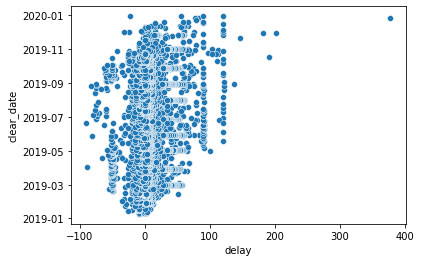

In [46]:
sns.scatterplot(data = X_train.merge(y_train,on=X_train.index), x = "delay" , y = "clear_date")

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

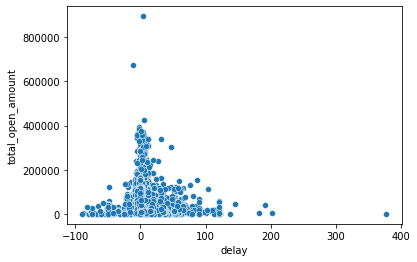

In [47]:
sns.scatterplot(data = X_train.merge(y_train,on=X_train.index), x = "delay" , y = "total_open_amount")

#### Frequency Table

In [48]:
coun_t  = X_train.nunique().to_frame(name = 'Counts')
coun_t

,Counts
business_code,5
cust_number,1228
name_customer,3305
clear_date,284
buisness_year,1
doc_id,25259
posting_date,283
document_create_date,286
due_in_date,343
total_open_amount,25246


#### Mode - Most Frequently occuring Element

In [49]:
X_train[['buisness_year']].agg(pd.Series.mode) 

,buisness_year
0,2019


#### Median - Ordinal Variables

In [50]:
X_train[['buisness_year']].agg(np.median).to_frame() 

,0
buisness_year,2019.0


#### Mean and Standard Deviation - interval level variables (total_open_amount)

In [51]:
X_train['total_open_amount'].agg(['mean','std']).to_frame()

,total_open_amount
mean,31545.701880
std,39659.017227


## Feature Engineering

##### Changing values to int or float format

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
#Encoding the values of name_customer to name_customer_enc using LabelEncoder
name_customer_enc = LabelEncoder()
name_customer_enc.fit(X_train["name_customer"])
X_train["name_customer_enc"]=name_customer_enc.transform(X_train["name_customer"])

In [54]:
name_customer_enc.fit(X_test["name_customer"])
X_test["name_customer_enc"]=name_customer_enc.transform(X_test["name_customer"])

In [55]:
name_customer_enc.fit(X_val["name_customer"])
X_val["name_customer_enc"]=name_customer_enc.transform(X_val["name_customer"])

In [56]:
#dropping the values of name customer in train,val and test
X_train.drop(["name_customer"],inplace=True,axis=1)
X_val.drop(["name_customer"],inplace=True,axis=1)
X_test.drop(["name_customer"],inplace=True,axis=1)

In [57]:
#creating a function aayu_das for dropping the future values of X_train,X_val,X_test
def aayu_das(col , traindf = X_train,valdf =X_val,testdf =X_test):
    traindf.drop(col,inplace=True,axis=1)
    valdf.drop(col,inplace=True,axis=1)
    testdf.drop(col,inplace=True,axis=1)
    return traindf,valdf,testdf

### Changing the date values into seperate columns as Year, Day and month

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27435 entries, 8212 to 46834
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27435 non-null  object        
 1   cust_number           27435 non-null  object        
 2   clear_date            27435 non-null  datetime64[ns]
 3   buisness_year         27435 non-null  int32         
 4   doc_id                27435 non-null  int32         
 5   posting_date          27435 non-null  datetime64[ns]
 6   document_create_date  27435 non-null  datetime64[ns]
 7   due_in_date           27435 non-null  datetime64[ns]
 8   total_open_amount     27435 non-null  float64       
 9   cust_payment_terms    27435 non-null  object        
 10  name_customer_enc     27435 non-null  int32         
dtypes: datetime64[ns](4), float64(1), int32(3), object(3)
memory usage: 2.2+ MB


In [59]:

X_train["year_posting_date"]= X_train["posting_date"].dt.year
X_val["year_posting_date"]= X_val["posting_date"].dt.year
X_test["week_posting_date"]= X_test["posting_date"].dt.year

X_train["day_posting_date"]= X_train["posting_date"].dt.day
X_val["day_posting_day"]= X_val["posting_date"].dt.day
X_test["day_posting_day"]= X_test["posting_date"].dt.day

X_train["month_posting_date"]= X_train["posting_date"].dt.month
X_val["month_posting_date"]= X_val["posting_date"].dt.month
X_test["month_posting_date"]= X_test["posting_date"].dt.month

In [60]:
X_train,X_val,X_test = aayu_das(["posting_date"])

In [61]:
X_train["year_due_in_date"]= X_train["due_in_date"].dt.year
X_val["year_due_in_date"]= X_val["due_in_date"].dt.year
X_test["year_due_in_date"]= X_test["due_in_date"].dt.year

X_train["day_due_in_date"]= X_train["due_in_date"].dt.day
X_val["day_due_in_date"]= X_val["due_in_date"].dt.day
X_test["day_due_in_date"]= X_test["due_in_date"].dt.day

X_train["month_due_in_date"]= X_train["due_in_date"].dt.month
X_val["month_due_in_date"]= X_val["due_in_date"].dt.month
X_test["month_due_in_date"]= X_test["due_in_date"].dt.month

In [62]:
X_train,X_val,X_test = aayu_das(["due_in_date"])

In [63]:
X_train["year_document_create_date"]= X_train["document_create_date"].dt.year
X_val["year_document_create_date"]= X_val["document_create_date"].dt.year
X_test["year_document_create_date"]= X_test["document_create_date"].dt.year

X_train["day_document_create_date"]= X_train["document_create_date"].dt.day
X_val["day_document_create_date"]= X_val["document_create_date"].dt.day
X_test["day_document_create_date"]= X_test["document_create_date"].dt.day

X_train["month_document_create_date"]= X_train["document_create_date"].dt.month
X_val["month_document_create_date"]= X_val["document_create_date"].dt.month
X_test["month_document_create_date"]= X_test["document_create_date"].dt.month

In [64]:
X_train,X_val,X_test = aayu_das(["document_create_date"])

In [65]:
#Encoding the values of cust_payment_terms to cust_payment_terms_enc using LabelEncoder
cust_payment_terms_enc = LabelEncoder()
cust_payment_terms_enc.fit(X_train["cust_payment_terms"])
X_train["cust_payment_terms_enc"]=cust_payment_terms_enc.transform(X_train["cust_payment_terms"])

In [66]:
cust_payment_terms_enc.fit(X_val["cust_payment_terms"])
X_val["cust_payment_terms_enc"]=cust_payment_terms_enc.transform(X_val["cust_payment_terms"])
cust_payment_terms_enc.fit(X_test["cust_payment_terms"])
X_test["cust_payment_terms_enc"]=cust_payment_terms_enc.transform(X_test["cust_payment_terms"])

In [67]:
X_train,X_val,X_test = aayu_das(["cust_payment_terms"])

#### Splitting the mixed column to Labels's and numericals seperately

In [68]:
mixed_cust_num="cust_number"
mixed_num_in_cust_num= mixed_cust_num + "_numerical"
mixed_label_in_cust_num= mixed_cust_num + "_label"

In [69]:
X_train[mixed_num_in_cust_num]=X_train[mixed_cust_num].str.extract('(\d+)')

In [70]:
X_train[mixed_label_in_cust_num]=X_train[mixed_cust_num].str[:3]

In [71]:
X_train["cust_number_numerical"]=X_train.cust_number_numerical.astype(int)

In [72]:
X_val[mixed_num_in_cust_num]=X_val[mixed_cust_num].str.extract('(\d+)')
X_val[mixed_label_in_cust_num]=X_val[mixed_cust_num].str[:3]
X_val["cust_number_numerical"]=X_val.cust_number_numerical.astype(int)

X_test[mixed_num_in_cust_num]=X_test[mixed_cust_num].str.extract('(\d+)')
X_test[mixed_label_in_cust_num]=X_test[mixed_cust_num].str[:3]
X_test["cust_number_numerical"]=X_test.cust_number_numerical.astype(int)

In [73]:
cust_number_label_enc = LabelEncoder()
cust_number_label_enc.fit(X_train["cust_number_label"])
X_train["cust_number_label_enc"]=cust_number_label_enc.transform(X_train["cust_number_label"])

In [74]:
cust_number_label_enc.fit(X_val["cust_number_label"])
X_val["cust_number_label_enc"]=cust_number_label_enc.transform(X_val["cust_number_label"])
cust_number_label_enc.fit(X_test["cust_number_label"])
X_test["cust_number_label_enc"]=cust_number_label_enc.transform(X_test["cust_number_label"])

In [75]:
X_train,X_val,X_test = aayu_das(["cust_number"])
X_train,X_val,X_test = aayu_das(["cust_number_label"])

In [76]:
#Encoding the values of business_code to business_code_enc using LabelEncoder
business_code_enc = LabelEncoder()
business_code_enc.fit(X_train["business_code"])
X_train["business_code_enc"]=business_code_enc.transform(X_train["business_code"])

business_code_enc.fit(X_val["business_code"])
X_val["business_code_enc"]=business_code_enc.transform(X_val["business_code"])

business_code_enc.fit(X_test["business_code"])
X_test["business_code_enc"]=business_code_enc.transform(X_test["business_code"])

In [77]:
X_train,X_val,X_test = aayu_das(["business_code"])

In [78]:
X_train,X_val,X_test = aayu_das(["clear_date"])

## Feature Selection

In [79]:
X_train.merge(y_train,on=X_train.index).corr()

,key_0,buisness_year,doc_id,total_open_amount,name_customer_enc,year_posting_date,day_posting_date,month_posting_date,year_due_in_date,day_due_in_date,month_due_in_date,year_document_create_date,day_document_create_date,month_document_create_date,cust_payment_terms_enc,cust_number_numerical,cust_number_label_enc,business_code_enc,delay
key_0,1.000000,NaN,-0.001556,0.002080,0.001338,1.016341e-02,0.016573,-0.015014,-8.731301e-03,-0.011541,-0.009042,9.260082e-03,0.013589,-0.015166,-0.006536,0.001206,-0.001876,-0.001751,0.010462
buisness_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc_id,-0.001556,NaN,1.000000,-0.188213,0.013856,-8.046759e-03,-0.001969,-0.010286,1.116965e-02,0.003890,0.001128,-1.587854e-02,-0.004607,-0.009515,0.517301,0.315135,0.181252,0.916804,-0.129938
total_open_amount,0.002080,NaN,-0.188213,1.000000,-0.009746,-2.276636e-03,0.014645,0.009032,-7.333956e-03,-0.010560,0.000731,4.239587e-03,0.019144,0.008168,-0.201921,-0.016310,-0.072495,-0.181884,0.007442
name_customer_enc,0.001338,NaN,0.013856,-0.009746,1.000000,-2.098980e-02,0.007777,-0.008406,-3.341335e-03,0.005014,-0.021261,-2.525595e-02,0.006897,-0.005819,0.089416,0.118321,-0.015670,-0.009364,-0.038188
year_posting_date,0.010163,NaN,-0.008047,-0.002277,-0.020990,1.000000e+00,-0.114636,-0.173741,-1.698986e-11,0.009838,0.119758,7.647945e-01,-0.101947,-0.163935,-0.000989,-0.015765,0.018324,-0.006387,0.005403
day_posting_date,0.016573,NaN,-0.001969,0.014645,0.007777,-1.146361e-01,1.000000,-0.048904,-1.058568e-02,-0.367415,0.063735,-3.584025e-02,0.828302,-0.051789,0.009827,0.000157,-0.013381,0.003762,-0.007038
month_posting_date,-0.015014,NaN,-0.010286,0.009032,-0.008406,-1.737414e-01,-0.048904,1.000000,1.587116e-02,0.027711,0.930759,-7.940681e-02,-0.037294,0.972101,0.004063,-0.001360,-0.026134,-0.009102,-0.016607
year_due_in_date,-0.008731,NaN,0.011170,-0.007334,-0.003341,-1.698986e-11,-0.010586,0.015871,1.000000e+00,-0.004878,-0.024775,-2.180632e-11,-0.010575,0.015801,0.023276,-0.009665,-0.004987,0.010035,-0.125987
day_due_in_date,-0.011541,NaN,0.003890,-0.010560,0.005014,9.838466e-03,-0.367415,0.027711,-4.877622e-03,1.000000,-0.115669,6.855340e-03,-0.374518,0.028537,0.000606,-0.005042,0.010562,0.006079,-0.007702


<AxesSubplot:title={'center':'Pearson Correlation Features'}>

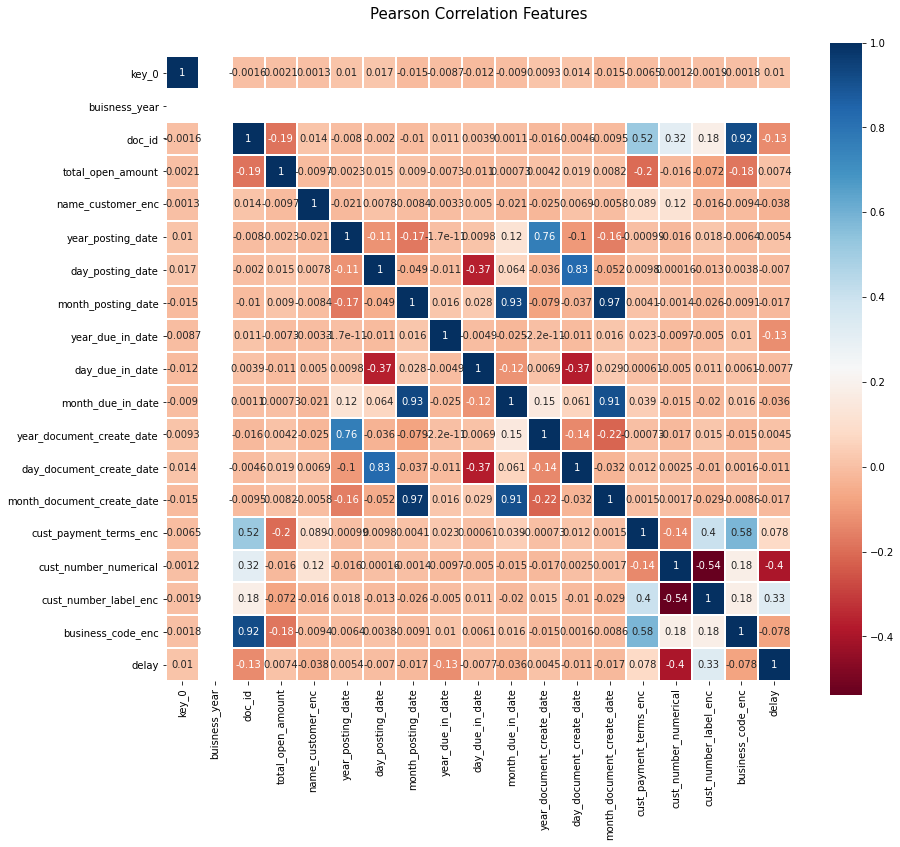

In [80]:
#Plotting colormap
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title("Pearson Correlation Features",y=1.05,size=15)
sns.heatmap(X_train.merge(y_train,on=X_train.index).corr(),linewidths=0.1,vmax=1.0,
           square=True, cmap=colormap, linecolor="white", annot=True)

# Modelling

In [81]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train,y_train)

LinearRegression()

#### Linear regression algorithm

In [82]:
y_predict=base_model.predict(X_val)

In [83]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict, squared=False)

8.491887272743915

In [84]:
pd.DataFrame(zip(y_val,y_predict),columns=["clear_date_predicted","delay"])

,clear_date_predicted,delay
0,-11.0,-8.376293
1,-8.0,-3.580223
2,0.0,-4.564343
3,0.0,0.489522
4,-5.0,-3.751004
...,...,...
5874,-1.0,-3.810091
5875,2.0,-4.400632
5876,-5.0,-4.744749
5877,-2.0,-3.902029


In [85]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

#### Decision tree regression algorithm

In [86]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [87]:
predicted2 =regressor.predict(X_val)

In [88]:
mean_squared_error(y_val,predicted2,squared=False)

8.26025436457224

In [89]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

12.334600958286126

# The lost data

In [90]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
6,U001,200726979,BJ'S,NaT,2020.0,1.930655e+09,2020-03-17,20200316,20200317,2020-04-01,USD,RV,1.0,NaN,387.69,20200317.0,NAA8,1.930655e+09,1,NaN
7,U001,200780383,MEIJ associates,NaT,2020.0,1.930855e+09,2020-05-04,20200503,20200504,2020-05-19,USD,RV,1.0,NaN,41352.28,20200504.0,NAA8,1.930855e+09,1,NaN
17,U001,0200776463,KROGE systems,NaT,2020.0,1.930826e+09,2020-04-24,20200425,20200424,2020-05-09,USD,RV,1.0,NaN,2915.48,20200424.0,NAA8,1.930826e+09,1,NaN
24,U001,200769623,WAL-MAR corp,NaT,2020.0,1.930677e+09,2020-03-23,20200321,20200323,2020-04-07,USD,RV,1.0,NaN,13902.00,20200323.0,NAH4,1.930677e+09,1,NaN
29,U001,0200769623,WAL-MAR co,NaT,2020.0,1.930705e+09,2020-03-26,20200326,20200326,2020-04-10,USD,RV,1.0,NaN,3270.04,20200326.0,NAH4,1.930705e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49979,U001,0200418007,AM foundation,NaT,2020.0,1.930780e+09,2020-04-15,20200413,20200415,2020-04-30,USD,RV,1.0,NaN,644.80,20200415.0,NAA8,1.930780e+09,1,NaN
49981,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930599e+09,2020-03-05,20200304,20200305,2020-03-20,USD,RV,1.0,NaN,16463.85,20200305.0,NAH4,1.930599e+09,1,NaN
49986,U001,0200759878,SA corporation,NaT,2020.0,1.930666e+09,2020-03-19,20200318,20200319,2020-04-03,USD,RV,1.0,NaN,47269.22,20200319.0,NAH4,1.930666e+09,1,NaN
49987,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930862e+09,2020-05-07,20200506,20200507,2020-05-22,USD,RV,1.0,NaN,25109.62,20200507.0,NAH4,1.930862e+09,1,NaN


In [91]:
main_test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
delay                     10000
dtype: int64

### Doing the same preprocessing and Feature engineering steps

In [92]:
#Removing the target clear date and clear date from X_main_test
X_main_test= main_test.drop(["delay","clear_date"],axis =1)
X_main_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
6,U001,200726979,BJ'S,2020.0,1.930655e+09,2020-03-17,20200316,20200317,2020-04-01,USD,RV,1.0,NaN,387.69,20200317.0,NAA8,1.930655e+09,1
7,U001,200780383,MEIJ associates,2020.0,1.930855e+09,2020-05-04,20200503,20200504,2020-05-19,USD,RV,1.0,NaN,41352.28,20200504.0,NAA8,1.930855e+09,1
17,U001,0200776463,KROGE systems,2020.0,1.930826e+09,2020-04-24,20200425,20200424,2020-05-09,USD,RV,1.0,NaN,2915.48,20200424.0,NAA8,1.930826e+09,1
24,U001,200769623,WAL-MAR corp,2020.0,1.930677e+09,2020-03-23,20200321,20200323,2020-04-07,USD,RV,1.0,NaN,13902.00,20200323.0,NAH4,1.930677e+09,1
29,U001,0200769623,WAL-MAR co,2020.0,1.930705e+09,2020-03-26,20200326,20200326,2020-04-10,USD,RV,1.0,NaN,3270.04,20200326.0,NAH4,1.930705e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49979,U001,0200418007,AM foundation,2020.0,1.930780e+09,2020-04-15,20200413,20200415,2020-04-30,USD,RV,1.0,NaN,644.80,20200415.0,NAA8,1.930780e+09,1
49981,U001,0200769623,WAL-MAR associates,2020.0,1.930599e+09,2020-03-05,20200304,20200305,2020-03-20,USD,RV,1.0,NaN,16463.85,20200305.0,NAH4,1.930599e+09,1
49986,U001,0200759878,SA corporation,2020.0,1.930666e+09,2020-03-19,20200318,20200319,2020-04-03,USD,RV,1.0,NaN,47269.22,20200319.0,NAH4,1.930666e+09,1
49987,U001,0200769623,WAL-MAR associates,2020.0,1.930862e+09,2020-05-07,20200506,20200507,2020-05-22,USD,RV,1.0,NaN,25109.62,20200507.0,NAH4,1.930862e+09,1


In [93]:
# Also removing both from main_test
main_test.drop(["delay","clear_date"],inplace=True,axis=1)

In [94]:
#Changing the dtype of the following
X_main_test["doc_id"]=X_main_test.doc_id.astype(int)
X_main_test["buisness_year"]=X_main_test.buisness_year.astype(int)


In [95]:
X_main_test.drop("invoice_id",axis=1,inplace=True) #removing invoice id

In [96]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 6 to 49998
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  object        
 1   cust_number             10000 non-null  object        
 2   name_customer           10000 non-null  object        
 3   buisness_year           10000 non-null  int32         
 4   doc_id                  10000 non-null  int32         
 5   posting_date            10000 non-null  object        
 6   document_create_date    10000 non-null  int64         
 7   document_create_date.1  10000 non-null  int64         
 8   due_in_date             10000 non-null  datetime64[ns]
 9   invoice_currency        10000 non-null  object        
 10  document type           10000 non-null  object        
 11  posting_id              10000 non-null  float64       
 12  area_business           0 non-null      float6

In [97]:
X_main_test["posting_date"]= pd.to_datetime(X_main_test["posting_date"])
X_main_test["document_create_date"]= pd.to_datetime(X_main_test.document_create_date,format='%Y%m%d')
X_main_test["baseline_create_date"]= pd.to_datetime(X_main_test.baseline_create_date,format='%Y%m%d')
#### Converting into datetime format


In [98]:
X_main_test.rename(columns={"document_create_date.1":"document_create_date1"}, inplace=True)

In [99]:
X_main_test["document_create_date1"]= pd.to_datetime(X_main_test.document_create_date1,format='%Y%m%d')

In [100]:
X_main_test.drop("document_create_date1",axis=1,inplace=True)
X_main_test.drop("area_business",axis=1,inplace=True)

In [101]:
X_main_test.business_code.value_counts()

U001    9178
CA02     731
U013      62
U002      25
U005       4
Name: business_code, dtype: int64

In [102]:
X_main_test["business_code"]= np.where(X_main_test["business_code"].isin(["U005"]),"Others",X_main_test["business_code"])

In [103]:
X_main_test.sort_values(by=["posting_date"],inplace=True)

In [104]:
X_main_test.rename(columns={"document type":"document_type"}, inplace=True)

In [105]:
X_main_test.posting_id.value_counts()

1.0    10000
Name: posting_id, dtype: int64

In [106]:
X_main_test.rename(columns={"isOpen":"is_open"}, inplace=True)

In [107]:
X_main_test.is_open.value_counts()

1    10000
Name: is_open, dtype: int64

In [108]:
X_main_test.drop("posting_id",axis=1,inplace=True)
X_main_test.drop("is_open",axis=1,inplace=True)

In [109]:
X_main_test.drop("invoice_currency",axis=1,inplace=True)

In [110]:
#removing baseline_create_date as it has the same values of posting_date
X_main_test.drop("baseline_create_date",axis=1,inplace=True)
#removing document_type as it has an array of same values "RV".
X_main_test.drop("document_type",axis=1,inplace=True)

In [111]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 24437 to 37286
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         10000 non-null  object        
 1   cust_number           10000 non-null  object        
 2   name_customer         10000 non-null  object        
 3   buisness_year         10000 non-null  int32         
 4   doc_id                10000 non-null  int32         
 5   posting_date          10000 non-null  datetime64[ns]
 6   document_create_date  10000 non-null  datetime64[ns]
 7   due_in_date           10000 non-null  datetime64[ns]
 8   total_open_amount     10000 non-null  float64       
 9   cust_payment_terms    10000 non-null  object        
dtypes: datetime64[ns](3), float64(1), int32(2), object(4)
memory usage: 781.2+ KB


In [112]:
name_customer_enc = LabelEncoder()
name_customer_enc.fit(X_main_test["name_customer"])
X_main_test["name_customer_enc"]=name_customer_enc.transform(X_main_test["name_customer"])

In [113]:
X_main_test.drop(["name_customer"],inplace=True,axis=1)

In [114]:
def aayu_das(col , traindf = X_main_test):
    traindf.drop(col,inplace=True,axis=1)
    return traindf

In [115]:
X_main_test["year_posting_date"]= X_main_test["posting_date"].dt.year
X_main_test["day_posting_date"]= X_main_test["posting_date"].dt.day
X_main_test["month_posting_date"]= X_main_test["posting_date"].dt.month

X_main_test["year_due_in_date"]= X_main_test["due_in_date"].dt.year
X_main_test["day_due_in_date"]= X_main_test["due_in_date"].dt.day
X_main_test["month_due_in_date"]= X_main_test["due_in_date"].dt.month

X_main_test["year_document_create_date"]= X_main_test["document_create_date"].dt.year
X_main_test["day_document_create_date"]= X_main_test["document_create_date"].dt.day
X_main_test["month_document_create_date"]= X_main_test["document_create_date"].dt.month


In [116]:
X_main_test = aayu_das(["document_create_date"])
X_main_test = aayu_das(["due_in_date"])
X_main_test = aayu_das(["posting_date"])

In [117]:
cust_payment_terms_enc = LabelEncoder()
cust_payment_terms_enc.fit(X_main_test["cust_payment_terms"])
X_main_test["cust_payment_terms_enc"]=cust_payment_terms_enc.transform(X_main_test["cust_payment_terms"])

In [118]:
X_main_test= aayu_das(["cust_payment_terms"])

In [119]:
mixed_cust_num="cust_number"
mixed_num_in_cust_num= mixed_cust_num + "_numerical"
mixed_label_in_cust_num= mixed_cust_num + "_label"

In [120]:
X_main_test[mixed_num_in_cust_num]=X_main_test[mixed_cust_num].str.extract('(\d+)')

In [121]:
X_main_test[mixed_label_in_cust_num]=X_main_test[mixed_cust_num].str[:3]

In [122]:
X_main_test["cust_number_numerical"]=X_main_test.cust_number_numerical.astype(int)

In [123]:
cust_number_label_enc = LabelEncoder()
cust_number_label_enc.fit(X_main_test["cust_number_label"])
X_main_test["cust_number_label_enc"]=cust_number_label_enc.transform(X_main_test["cust_number_label"])

In [124]:
X_main_test = aayu_das(["cust_number"])
X_main_test = aayu_das(["cust_number_label"])

In [125]:
business_code_enc = LabelEncoder()
business_code_enc.fit(X_main_test["business_code"])
X_main_test["business_code_enc"]=business_code_enc.transform(X_main_test["business_code"])

In [126]:
X_main_test = aayu_das(["business_code"])

In [127]:
X_main_test.columns

Index(['buisness_year', 'doc_id', 'total_open_amount', 'name_customer_enc',
       'year_posting_date', 'day_posting_date', 'month_posting_date',
       'year_due_in_date', 'day_due_in_date', 'month_due_in_date',
       'year_document_create_date', 'day_document_create_date',
       'month_document_create_date', 'cust_payment_terms_enc',
       'cust_number_numerical', 'cust_number_label_enc', 'business_code_enc'],
      dtype='object')

In [128]:
X_train.columns

Index(['buisness_year', 'doc_id', 'total_open_amount', 'name_customer_enc',
       'year_posting_date', 'day_posting_date', 'month_posting_date',
       'year_due_in_date', 'day_due_in_date', 'month_due_in_date',
       'year_document_create_date', 'day_document_create_date',
       'month_document_create_date', 'cust_payment_terms_enc',
       'cust_number_numerical', 'cust_number_label_enc', 'business_code_enc'],
      dtype='object')

### Both the dataframes are having same number of columns

## The Finale

In [129]:
#Prediction 
final_result = regressor.predict(X_main_test)

In [130]:
final_result = pd.Series(final_result,name='Predicted_Delay')

In [131]:
#Resetting the index for merging the predicted series with it
Final = main_test.merge(final_result , on = X_main_test.index )
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Predicted_Delay
0,24437,U001,200726979,BJ'S,2020.0,1.930655e+09,2020-03-17,20200316,20200317,2020-04-01,USD,RV,1.0,NaN,387.69,20200317.0,NAA8,1.930655e+09,1,0.898752
1,21000,U001,200780383,MEIJ associates,2020.0,1.930855e+09,2020-05-04,20200503,20200504,2020-05-19,USD,RV,1.0,NaN,41352.28,20200504.0,NAA8,1.930855e+09,1,0.898752
2,2893,U001,0200776463,KROGE systems,2020.0,1.930826e+09,2020-04-24,20200425,20200424,2020-05-09,USD,RV,1.0,NaN,2915.48,20200424.0,NAA8,1.930826e+09,1,0.898752
3,16444,U001,200769623,WAL-MAR corp,2020.0,1.930677e+09,2020-03-23,20200321,20200323,2020-04-07,USD,RV,1.0,NaN,13902.00,20200323.0,NAH4,1.930677e+09,1,0.898752
4,10322,U001,0200769623,WAL-MAR co,2020.0,1.930705e+09,2020-03-26,20200326,20200326,2020-04-10,USD,RV,1.0,NaN,3270.04,20200326.0,NAH4,1.930705e+09,1,0.898752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30249,U001,0200418007,AM foundation,2020.0,1.930780e+09,2020-04-15,20200413,20200415,2020-04-30,USD,RV,1.0,NaN,644.80,20200415.0,NAA8,1.930780e+09,1,2.634146
9996,40940,U001,0200769623,WAL-MAR associates,2020.0,1.930599e+09,2020-03-05,20200304,20200305,2020-03-20,USD,RV,1.0,NaN,16463.85,20200305.0,NAH4,1.930599e+09,1,0.898752
9997,731,U001,0200759878,SA corporation,2020.0,1.930666e+09,2020-03-19,20200318,20200319,2020-04-03,USD,RV,1.0,NaN,47269.22,20200319.0,NAH4,1.930666e+09,1,2.634146
9998,35429,U001,0200769623,WAL-MAR associates,2020.0,1.930862e+09,2020-05-07,20200506,20200507,2020-05-22,USD,RV,1.0,NaN,25109.62,20200507.0,NAH4,1.930862e+09,1,0.898752


In [132]:
Final["Predicted_Delay"].round()

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9995    3.0
9996    1.0
9997    3.0
9998    1.0
9999    1.0
Name: Predicted_Delay, Length: 10000, dtype: float64

In [133]:
Final["Predicted_Delay"]=Final.Predicted_Delay.astype(int)

In [134]:
Final["Predicted_Delay"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    2
9996    0
9997    2
9998    0
9999    0
Name: Predicted_Delay, Length: 10000, dtype: int32

In [135]:
from datetime import timedelta
Final['predicted_payment_date']= Final['due_in_date'] + pd.to_timedelta(Final['Predicted_Delay'],'d')

In [136]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Predicted_Delay,predicted_payment_date
0,24437,U001,200726979,BJ'S,2020.0,1.930655e+09,2020-03-17,20200316,20200317,2020-04-01,USD,RV,1.0,NaN,387.69,20200317.0,NAA8,1.930655e+09,1,0,2020-04-01
1,21000,U001,200780383,MEIJ associates,2020.0,1.930855e+09,2020-05-04,20200503,20200504,2020-05-19,USD,RV,1.0,NaN,41352.28,20200504.0,NAA8,1.930855e+09,1,0,2020-05-19
2,2893,U001,0200776463,KROGE systems,2020.0,1.930826e+09,2020-04-24,20200425,20200424,2020-05-09,USD,RV,1.0,NaN,2915.48,20200424.0,NAA8,1.930826e+09,1,0,2020-05-09
3,16444,U001,200769623,WAL-MAR corp,2020.0,1.930677e+09,2020-03-23,20200321,20200323,2020-04-07,USD,RV,1.0,NaN,13902.00,20200323.0,NAH4,1.930677e+09,1,0,2020-04-07
4,10322,U001,0200769623,WAL-MAR co,2020.0,1.930705e+09,2020-03-26,20200326,20200326,2020-04-10,USD,RV,1.0,NaN,3270.04,20200326.0,NAH4,1.930705e+09,1,0,2020-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30249,U001,0200418007,AM foundation,2020.0,1.930780e+09,2020-04-15,20200413,20200415,2020-04-30,USD,RV,1.0,NaN,644.80,20200415.0,NAA8,1.930780e+09,1,2,2020-05-02
9996,40940,U001,0200769623,WAL-MAR associates,2020.0,1.930599e+09,2020-03-05,20200304,20200305,2020-03-20,USD,RV,1.0,NaN,16463.85,20200305.0,NAH4,1.930599e+09,1,0,2020-03-20
9997,731,U001,0200759878,SA corporation,2020.0,1.930666e+09,2020-03-19,20200318,20200319,2020-04-03,USD,RV,1.0,NaN,47269.22,20200319.0,NAH4,1.930666e+09,1,2,2020-04-05
9998,35429,U001,0200769623,WAL-MAR associates,2020.0,1.930862e+09,2020-05-07,20200506,20200507,2020-05-22,USD,RV,1.0,NaN,25109.62,20200507.0,NAH4,1.930862e+09,1,0,2020-05-22


# Bucketization

In [137]:
def bucketization(x):
    if x<0:
        return('(< 0) Days')
    if x in range(0,16):
        return('(0-15) Days')
    elif x in range(16,31):
        return('(16-30) Days')
    elif x in range(31,45):
        return('(31-45) Days')
    elif x in range(45,60):
        return('(45-60) Days')
    else:
        return('(> 60) Days')

In [138]:
Final = Final.reset_index(drop=True)
Final['DELAY BUCKET(DAYS)']= pd.Series([bucketization(x=Final['Predicted_Delay'][i])  for i in range(len(Final))])
bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}
Final['delay_bucket_id'] = Final['DELAY BUCKET(DAYS)'].map(bucket_mapper)
Final.columns

Index(['key_0', 'business_code', 'cust_number', 'name_customer',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen',
       'Predicted_Delay', 'predicted_payment_date', 'DELAY BUCKET(DAYS)',
       'delay_bucket_id'],
      dtype='object')

In [139]:
Final['DELAY BUCKET(DAYS)'].value_counts()

(0-15) Days     9319
(< 0) Days       521
(31-45) Days     156
(16-30) Days       4
Name: DELAY BUCKET(DAYS), dtype: int64

# Finally the prediction is done!

In [140]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Predicted_Delay,predicted_payment_date,DELAY BUCKET(DAYS),delay_bucket_id
0,24437,U001,200726979,BJ'S,2020.0,1.930655e+09,2020-03-17,20200316,20200317,2020-04-01,USD,RV,1.0,NaN,387.69,20200317.0,NAA8,1.930655e+09,1,0,2020-04-01,(0-15) Days,1
1,21000,U001,200780383,MEIJ associates,2020.0,1.930855e+09,2020-05-04,20200503,20200504,2020-05-19,USD,RV,1.0,NaN,41352.28,20200504.0,NAA8,1.930855e+09,1,0,2020-05-19,(0-15) Days,1
2,2893,U001,0200776463,KROGE systems,2020.0,1.930826e+09,2020-04-24,20200425,20200424,2020-05-09,USD,RV,1.0,NaN,2915.48,20200424.0,NAA8,1.930826e+09,1,0,2020-05-09,(0-15) Days,1
3,16444,U001,200769623,WAL-MAR corp,2020.0,1.930677e+09,2020-03-23,20200321,20200323,2020-04-07,USD,RV,1.0,NaN,13902.00,20200323.0,NAH4,1.930677e+09,1,0,2020-04-07,(0-15) Days,1
4,10322,U001,0200769623,WAL-MAR co,2020.0,1.930705e+09,2020-03-26,20200326,20200326,2020-04-10,USD,RV,1.0,NaN,3270.04,20200326.0,NAH4,1.930705e+09,1,0,2020-04-10,(0-15) Days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30249,U001,0200418007,AM foundation,2020.0,1.930780e+09,2020-04-15,20200413,20200415,2020-04-30,USD,RV,1.0,NaN,644.80,20200415.0,NAA8,1.930780e+09,1,2,2020-05-02,(0-15) Days,1
9996,40940,U001,0200769623,WAL-MAR associates,2020.0,1.930599e+09,2020-03-05,20200304,20200305,2020-03-20,USD,RV,1.0,NaN,16463.85,20200305.0,NAH4,1.930599e+09,1,0,2020-03-20,(0-15) Days,1
9997,731,U001,0200759878,SA corporation,2020.0,1.930666e+09,2020-03-19,20200318,20200319,2020-04-03,USD,RV,1.0,NaN,47269.22,20200319.0,NAH4,1.930666e+09,1,2,2020-04-05,(0-15) Days,1
9998,35429,U001,0200769623,WAL-MAR associates,2020.0,1.930862e+09,2020-05-07,20200506,20200507,2020-05-22,USD,RV,1.0,NaN,25109.62,20200507.0,NAH4,1.930862e+09,1,0,2020-05-22,(0-15) Days,1


### Exported the final dataframe to csv

In [141]:
#Final.to_csv('H2HBABBA1529_final1.csv', sep='\t')